<div align="center">

### **PARCIAL #1 SEÑALES Y SISTEMAS - 2025 2S**
#### **Estudiante:** Martín Ramírez Espinosa
##### Departamento de Ingeniería Eléctrica, Electrónica y Computación
##### Universidad Nacional de Colombia - Sede Manizales

</div>

---

In [2]:
import numpy as np
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

matplotlib.rcParams['animation.embed_limit'] = 60  # MB

---

**1.** La distancia media entre dos señales periódicas $x_1(t) \in \mathbb{R}, \mathbb{C}$ y $x_2(t) \in \mathbb{R}, \mathbb{C}$; se puede expresar a partir de la potencia media de la diferencia entre ellas:

<div align="center">

$d^2(x_1, x_2) = \overline{P}_{(x_1 - x_2)} = \lim_{T\to\infty} \frac{1}{T} \int_{T} \left| x_{1}(t) - x_{2}(t) \right|^{2} \, dt$

</div>

Sean $x_1(t)$ y $x_2(t)$ definidas como:

<div align="center">

$
\begin{aligned}
x_{1}(t) &= A e^{-\mathrm{j} n \omega_{0} t} &\qquad& \omega_{0}=\frac{2\pi}{\Tau},\ \ \Tau,A,B\in\mathbb{R}^{+},\ \ n,m\in\mathbb{Z} \\
x_{2}(t) &= B e^{\mathrm{j} m \omega_{0} t} &&
\end{aligned}
$

</div>

Determine la distancia entre las dos señales. Compruebe sus resultados con Python.

In [3]:
''' Definición simbólica '''
# Variable independiente
t = sp.symbols('t', real=True) # Tiempo [s]

# Parámetros de las señales
A, B = sp.symbols('A B', real=True, positive=True)  # Amplitudes
T = sp.symbols('T', real=True, positive=True)       # Periodo [s]
w_0 = 2 * sp.pi / T                                 # Frecuencia angular fundamental [rad/s]
n, m = sp.symbols('n m', integer=True)              # Múltiplos enteros de la frecuencia fundamental

# Definición de las señales
x_1 = A * sp.exp( -sp.I * n * w_0 * t )  # x_1(t)
x_2 = B * sp.exp( sp.I * m * w_0 * t )   # x_2(t)

''' Cálculo de la distancia media '''
# Evaluar la distancia media
d = sp.sqrt( sp.Limit( (1/T) * sp.integrate( sp.Abs(x_1 - x_2)**2, (t, 0, T) ), T, sp.oo ) )
# Imprimir el resultado
d.simplify()

Piecewise((sqrt(A**2 + B**2), Ne(m, -n)), (sqrt(A**2 - 2*A*B + B**2), True))

---

**2.** Encuentre la señal en tiempo discreto al utilizar un conversor análogo a digital con frecuencia de muestreo de $5 kHz$ y $4 bits$ de capacidad de representación aplicado a la señal continua:

<div align="center">

$x(t) = 3\cos(1000\pi t) + 5\sin(3000\pi t) + 10\cos(11000\pi t)$

</div>

Realizar la simulación del proceso de discretización de al menos tres periodos de $x(t)$. En caso de que la discretización no sea apropiada, diseñe e implemete un conversor adecuado para la señal estudiada.

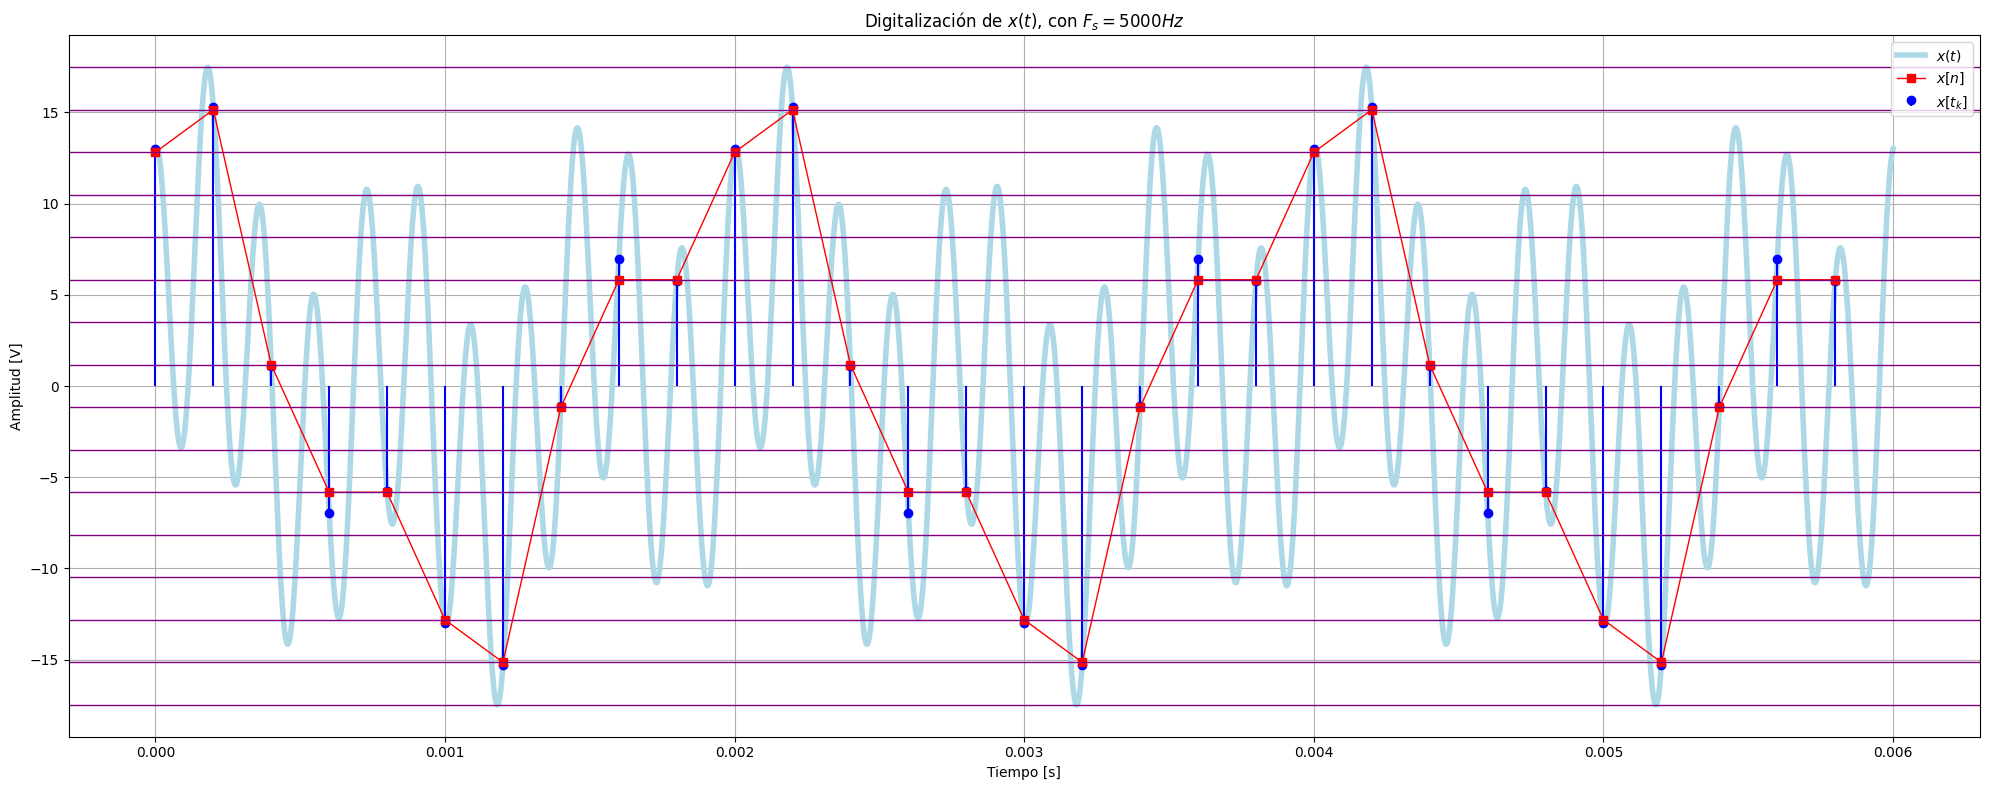

In [4]:
''' Parámetros del conversor A/D '''
# Muestreo
F_s = 5000     # Frecuencia de muestreo [Hz]
T_s = 1 / F_s  # Periodo de muestreo [s]

# Capacidad de representación
n_bits = 4              # Número de bits
num_levels = 2**n_bits  # Número de niveles de cuantización

''' Tiempos '''
T_0 = 1 / 500                        # Periodo de la señal x(t) [s]
sim_time = 3 * T_0                   # Tiempo de simulación [s]
t = np.linspace(0, sim_time, 20000)  # Vector de tiempo 'continuo' [s]
t_k = np.arange(0, sim_time, T_s)    # Vector de tiempo discreto [s]

''' Señal x(t) '''
x_t = 3 * np.cos(1000*np.pi*t) + 5 * np.sin(3000*np.pi*t) + 10 * np.cos(11000*np.pi*t)  # x(t) [V]

''' Digitalización '''
# Discretización
x_tk = 3 * np.cos(1000*np.pi*t_k) + 5 * np.sin(3000*np.pi*t_k) + 10 * np.cos(11000*np.pi*t_k)  # x[t_k] [V]

# Cuantización
levels = np.linspace(min(x_t), max(x_t), num_levels)  # Vector de niveles de cuantización
distances = np.abs(x_tk[:, None] - levels[None, :])   # Matriz de distancias entre muestras y niveles
indices = np.argmin(distances, axis=1)                # Índices de los niveles más cercanos

# Señal digitalizada
x_n = levels[indices]  # x[n] [V]

''' Visualización '''
# Gráfica 1: Digitalización de x(t) con Fs = 5000 Hz (incumple Nyquist)
plt.figure(figsize=(20, 8))
plt.plot(t, x_t, label='$x(t)$', color='lightblue', linewidth=4)
plt.stem(t_k, x_tk, label='$x[t_k]$', linefmt='blue', markerfmt='blue', basefmt=" ")
plt.plot(t_k, x_n, label='$x[n]$', color='red', marker='s', linestyle='-', linewidth=1)

# Dibujar los niveles de cuantización como rectas constantes
for lvl in levels:
	plt.axhline(lvl, color='purple', linewidth=1)

plt.title('Digitalización de $x(t)$, con $F_s = {} Hz$'.format(F_s))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Digitalización adecuada de $x(t)$:**

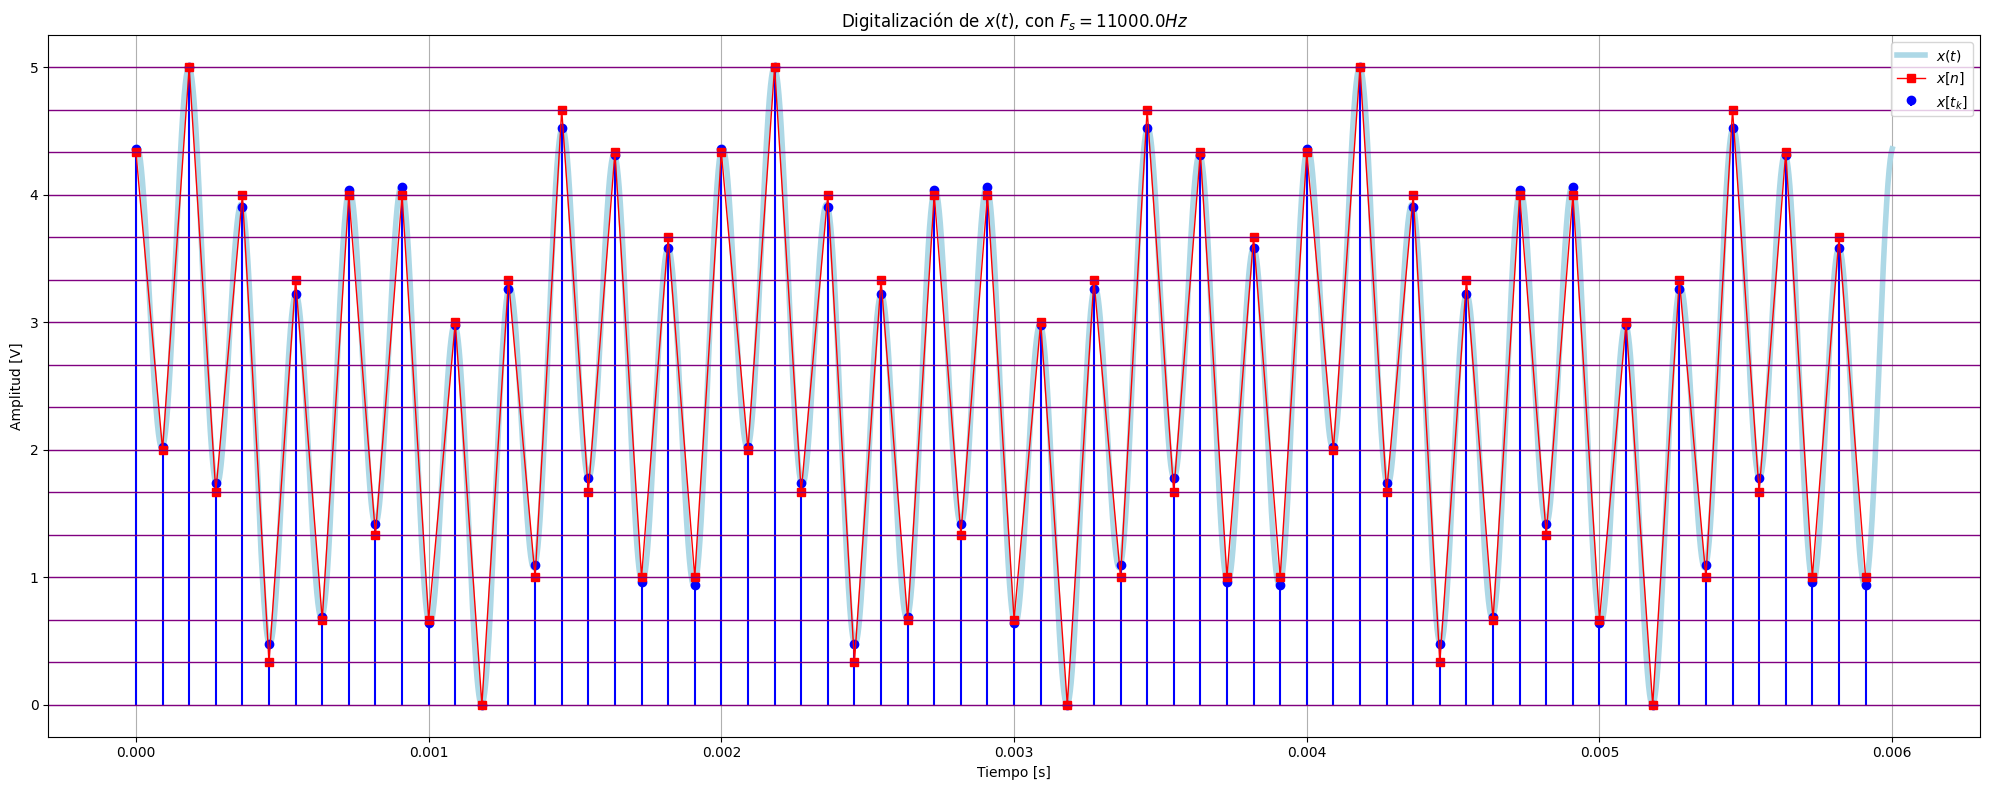

In [5]:
# Función que ajusta una señal al rango [V_min, V_max]
def adjust_signal(signal, V_min, V_max):
	gain = (V_max - V_min) / (max(signal) - min(signal))  # Ganancia [V/V]
	offset = V_min - gain * min(signal)                   # Offset [V]
	return gain * signal + offset                         # Señal ajustada

# Función que muestrea una señal continua
def sample_signal(signal, t_start, t_end, F_s):
	T_s = 1/F_s                                   # Periodo de muestreo [s]
	t = np.linspace(t_start, t_end, len(signal))  # Vector de tiempo 'continuo' [s]
	t_k = np.arange(t_start, t_end, T_s)          # Vector de tiempo discreto [s]
	sampled_signal = np.interp(t_k, t, signal)    # Señal muestreada [V]
	return t_k, sampled_signal

''' Parámetros del conversor A/D '''
# Muestreo
F_s = 2 * (11000 / 2)   # Frecuencia de muestreo [Hz] (Fs >= 2*f_max)
T_s = 1 / F_s           # Periodo de muestreo [s]

# Capacidad de representación
n_bits = 4              # Número de bits
num_levels = 2**n_bits  # Número de niveles de cuantización
V_min, V_max = 0, 5     # Rango de voltajes [V]

''' Tiempos '''
T_0 = 1 / 500                        # Periodo de la señal x(t) [s]
sim_time = 3 * T_0                   # Tiempo de simulación [s]
t = np.linspace(0, sim_time, 20000)  # Vector de tiempo 'continuo' [s]

''' Señal x(t) '''
# Original
x_t = 3 * np.cos(1000*np.pi*t) + 5 * np.sin(3000*np.pi*t) + 10 * np.cos(11000*np.pi*t)  # x(t) [V]
# Ajuste
x_t = adjust_signal(x_t, V_min, V_max)

''' Digitalización '''
# Discretización
t_k, x_tk = sample_signal(x_t, 0, sim_time, F_s)  # t_k [s], x[t_k] [V]

# Cuantización
levels = np.linspace(min(x_t), max(x_t), num_levels)  # Vector de niveles de cuantización
distances = np.abs(x_tk[:, None] - levels[None, :])   # Matriz de distancias entre muestras y niveles
indices = np.argmin(distances, axis=1)                # Índices de los niveles más cercanos

# Señal digitalizada
x_n = levels[indices]  # x[n] [V]

''' Visualización '''
# Gráfica 2: Digitalización de x(t) cumpliendo Nyquist
plt.figure(figsize=(20, 8))
plt.plot(t, x_t, label='$x(t)$', color='lightblue', linewidth=4)
plt.stem(t_k, x_tk, label='$x[t_k]$', linefmt='blue', markerfmt='blue', basefmt=" ")
plt.plot(t_k, x_n, label='$x[n]$', color='red', marker='s', linestyle='-', linewidth=1)

# Dibujar los niveles de cuantización como rectas constantes
for lvl in levels:
	plt.axhline(lvl, color='purple', linewidth=1)

plt.title('Digitalización de $x(t)$, con $F_s = {} Hz$'.format(F_s))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

---

**3.** Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t \in [t_i, t_f]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

<div align="center">

$c_n = \frac{1}{(t_{i}-t_{f})n^2\omega_0^2} \int_{t_i}^{t_f} x''(t)\, e^{-j n \omega_0 t}\, dt, \qquad n \in \mathbb{Z}$

</div>

¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?

---

**4.** Encuentre el espectro de Fourier, su parte real e imaginaria, magnitud, fase y el error relativo de la estimación para $n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$ a partir de $x''(t)$ para la señal $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$. Presente la simulaciones de Python respectivas.

<div align="center">
  <img src="Signal.png" alt="Signal" width="500">
  <br><strong>Figura 1. Señal x(t)</strong><br>
</div>

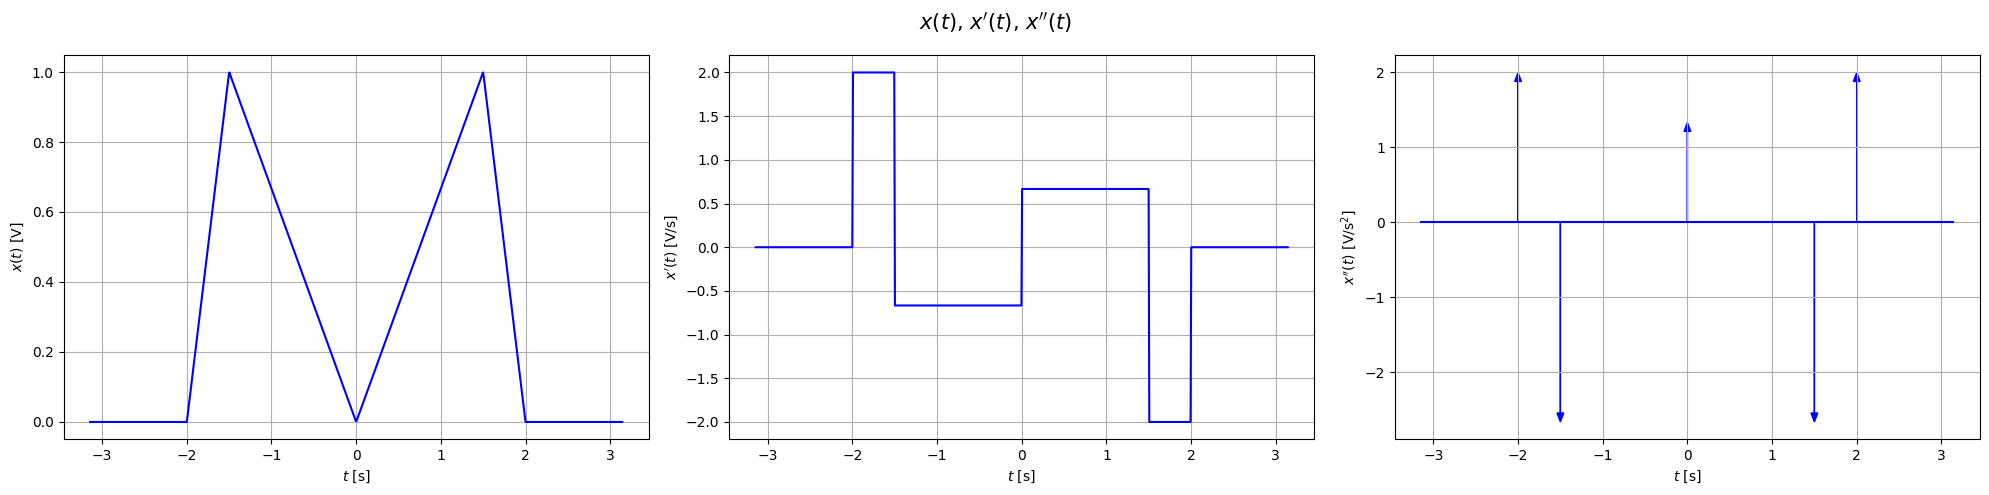

In [6]:
''' Definición simbólica '''
# Variable independiente
t = sp.symbols('t', real=True)  # Tiempo [s]

# Parámetros de la señal
T, d_1, d_2, A = sp.symbols('T d_1 d_2 A', real=True, positive=True)  # Periodo [s], duraciones [s] y valor pico [V]
w_0 = 2 * sp.pi / T                     # Frecuencia angular fundamental [rad/s]
m_1 = A / (d_2 - d_1); b_1 = m_1 * d_2  # Pendiente y corte en y de la primera rampa ascendente [V/s], [V]
m_2 = A / d_1;         b_2 = 0          # Pendiente y corte en y de la segunda rampa descendente [V/s], [V]

# x(t) [V]
x_t = sp.Piecewise(
    (0,            sp.And(t >= -T/2, t < -d_2)),  # 0 si t ∈ [-T/2, -d_2)
    (m_1*t + b_1,  sp.And(t >= -d_2, t < -d_1)),  # m_1*t + b_1 si t ∈ [-d_2, -d_1)
    (-m_2*t + b_2, sp.And(t >= -d_1, t < 0)),     # -m_2*t + b_2 si t ∈ [-d_1, 0)
    (m_2*t + b_2,  sp.And(t >= 0,    t < d_1)),   # m_2*t + b_2 si t ∈ [0, d_1)
    (-m_1*t + b_1, sp.And(t >= d_1,  t < d_2)),   # -m_1*t + b_1 si t ∈ [d_1, d_2)
    (0,            sp.And(t >= d_2,  t <= T/2))   # 0 si t ∈ [d_2, T/2]
)

# x'(t) [V/s]
x_p = sp.Piecewise(
    (0,     sp.And(t >= -T/2, t < -d_2)),  # 0 si t ∈ [-T/2, -d_2)
    (m_1,   sp.And(t >= -d_2, t < -d_1)),  # m_1 si t ∈ [-d_2, -d_1)
    (-m_2,  sp.And(t >= -d_1, t < 0)),     # -m_2 si t ∈ [-d_1, 0)
    (m_2,   sp.And(t >= 0,    t < d_1)),   # m_2 si t ∈ [0, d_1)
    (-m_1,  sp.And(t >= d_1,  t < d_2)),   # -m_1 si t ∈ [d_1, d_2)
    (0,     sp.And(t >= d_2,  t <= T/2))   # 0 si t ∈ [d_2, T/2]
)

''' Evaluación numérica y visualización '''
# Parámetros de la señal
PARAMS = {A: 1, T: 2*sp.pi, d_1: 1.5, d_2: 2.0}

# x(t) y x'(t) como funciones numéricas
X_t = sp.lambdify(t, x_t.subs(PARAMS), modules=['numpy'])
X_p = sp.lambdify(t, x_p.subs(PARAMS), modules=['numpy'])

# Parámetros numéricos
Tau = float(sp.N(T.subs(PARAMS)))              # Periodo [s]
W_0  = float(sp.N(w_0.subs(PARAMS)))           # Frecuencia angular fundamental [rad/s]
D_1 = float(sp.N(d_1.subs(PARAMS)))            # Duraciones [s]
D_2 = float(sp.N(d_2.subs(PARAMS)))
M_1 = float(sp.N((A/(D_2-D_1)).subs(PARAMS)))  # Pendientes [V/s]
M_2 = float(sp.N((A/D_1).subs(PARAMS)))

# Vector de tiempo para graficar
t_vals = np.linspace(-Tau/2, Tau/2, 800)  # [s]

# Figura con las tres gráficas
fig1, axs1 = plt.subplots(1, 3, figsize=(20, 5), sharex=True)  # Comparten eje x
fig1.suptitle("$x(t)$, $x'(t)$, $x''(t)$", fontsize=15)

# x(t) [V]
axs1[0].plot(t_vals, X_t(t_vals), color='blue')
axs1[0].set_xlabel("$t$ [s]")
axs1[0].set_ylabel("$x(t)$ [V]")
axs1[0].grid(True)

# x'(t) [V/s]
axs1[1].plot(t_vals, X_p(t_vals), color='blue')
axs1[1].set_xlabel("$t$ [s]")
axs1[1].set_ylabel("$x'(t)$ [V/s]")
axs1[1].grid(True)

# x''(t) [V/s^2]
X_pp = np.zeros(len(t_vals))  # Segunda derivada es cero en todas partes excepto en las deltas de Dirac
dirac_on = np.array([-D_2, -D_1, 0.0, D_1, D_2])                      # Encendimientos de las deltas de Dirac [s]
dirac_weights  = np.array([M_1, -(M_1+M_2), 2*M_2, -(M_1+M_2), M_1])  # 'Magnitudes' de las deltas de Dirac [V/s]
# Representar deltas de Dirac como flechas (vector-like)
for x, y in zip(dirac_on, dirac_weights):
    axs1[2].arrow(x, 0, 0, y, head_width=0.08, head_length=0.12, length_includes_head=True, color='blue')
axs1[2].plot(t_vals, X_pp, color='blue')
axs1[2].set_ylabel(r"$x''(t)$ [V/s$^2$]")
axs1[2].set_xlabel("$t$ [s]")
axs1[2].grid(True)

plt.tight_layout()
display(fig1)
plt.close(fig1)

In [7]:
''' Análisis de Fourier '''
# Armónico n-ésimo
n = sp.symbols('n', integer=True)

# Coeficiente 0: media de x(t)
c_0 = (A * d_2) / T

# Coeficiente n-ésimo de la serie
c_n = (-1 / (T * n**2 * w_0**2)) * ((2*m_1*sp.cos(d_2*n*w_0) - 2*(m_1 + m_2)*sp.cos(d_1*n*w_0) + 2*m_2))  # n != 0

''' Coeficientes y métricas de la señal '''
# Función numérica de c_n
def C_n(k: int) -> complex:
    if k == 0:
        return complex(float(sp.N(c_0.subs(PARAMS))))
    
    else:
        return complex(sp.N( c_n.subs(PARAMS).subs(n, int(k)) ))

# Potencia de x(t)
P_x = float(sp.N(((2 * A**2 * d_2) / (3 * T)).subs(PARAMS))) # [V^2]

# Potencia de x_hat(t)
def P_xhat(N: int) -> float:
    return float( sum( abs(C_n(k))**2 for k in range(-N, N+1) ) ) # [V^2]

# Error relativo
def e_r(N: int) -> float:
    return float( (1.0 - P_xhat(N)/P_x) * 100.0 ) # [%]

''' Parametros de la animación '''
N_MAX = 5               # Número máximo de armónicos
NUM_T_VALUES = 500      # Resolución del eje temporal
INTERVAL_MS = 1000      # Intervalo entre frames [ms]
H_POS_COLOR = "orange"  # Color de resaltado para +N
H_NEG_COLOR = "purple"  # Color de resaltado para -N

''' Malla temporal '''
t_vals = np.linspace(-Tau/2, Tau/2, NUM_T_VALUES)  # Vector de tiempo [s]
x_vals = X_t(t_vals)                               # x(t) [V]

''' Espectro '''
n_vals = range(-N_MAX, N_MAX+1)               # Índices de armónicos
Cn_vals = np.array([C_n(k) for k in n_vals])  # Vector de coeficientes
abs_C = np.abs(Cn_vals)                       # Vector de magnitudes
arg_C = np.angle(Cn_vals)                     # Vector de ángulos [rad]
real_C = np.real(Cn_vals)                     # Vector de partes reales
imag_C = np.imag(Cn_vals)                     # Vector de partes imaginarias

''' Animación '''
# Figura con 6 gráficas
fig2 = plt.figure(figsize=(20, 10), constrained_layout=True)
gs = fig2.add_gridspec(nrows=2, ncols=3)  # 2 filas, 3 columnas

ax_re   = fig2.add_subplot(gs[0, 0])  # Re{C_k e^(j*k*w_0*t)} superpuesto
ax_im   = fig2.add_subplot(gs[0, 1])  # Im{C_k e^(j*k*w_0*t)} superpuesto
ax_Cn   = fig2.add_subplot(gs[0, 2])  # C_n vs n (Re e Im superpuestos)
ax_mag  = fig2.add_subplot(gs[1, 0])  # |C_n| vs n
ax_arg  = fig2.add_subplot(gs[1, 2])  # Arg(C_n) vs n
ax_time = fig2.add_subplot(gs[1, 1])  # x(t), x_hat(t) y error(t)

fig2.suptitle("Análisis de Fourier a partir de $x''(t)$", fontsize=13)

# Fila superior: Re/Im en el tiempo y C_n
re_lines = [ax_re.plot(t_vals, np.nan*np.zeros_like(t_vals), lw=1)[0] for _ in range(N_MAX)]
ax_re.set_title(r"Superposición $\Re\{C_k e^{j k \omega_0 t}\}$")
ax_re.set_xlabel("$t$ [s]"); ax_re.set_ylabel("Amplitud")
ax_re.grid(True); ax_re.set_xlim(t_vals[0], t_vals[-1])

im_lines = [ax_im.plot(t_vals, np.nan*np.zeros_like(t_vals), lw=1)[0] for _ in range(N_MAX)]
ax_im.set_title(r"Superposición $\Im\{C_k e^{j k \omega_0 t}\}$")
ax_im.set_xlabel("$t$ [s]"); ax_im.set_ylabel("Amplitud")
ax_im.grid(True); ax_im.set_xlim(t_vals[0], t_vals[-1])

# Un solo eje para C_n: superponer Re{C_n} e Im{C_n}
stem_re = ax_Cn.stem(n_vals, real_C, linefmt="C0-", markerfmt="C0o", basefmt=" ")
stem_im = ax_Cn.stem(n_vals, imag_C, linefmt="C2-", markerfmt="C2s", basefmt=" ")
ax_Cn.set_title(r"$C_n$ vs $n$ (superpuesto: $\Re\{C_n\}$ y $\Im\{C_n\}$)")
ax_Cn.set_xlabel("$n$"); ax_Cn.set_ylabel(r"$C_n$"); ax_Cn.grid(True)
# Marcadores de resaltado (real: círculo; imag: cuadrado)
hi_Cn_pos_re, = ax_Cn.plot([], [], marker="o", linestyle="", color=H_POS_COLOR, ms=9)  # +N (real)
hi_Cn_neg_re, = ax_Cn.plot([], [], marker="o", linestyle="", color=H_NEG_COLOR, ms=9)  # -N (real)
hi_Cn_pos_im, = ax_Cn.plot([], [], marker="s", linestyle="", color=H_POS_COLOR, ms=9)  # +N (imag)
hi_Cn_neg_im, = ax_Cn.plot([], [], marker="s", linestyle="", color=H_NEG_COLOR, ms=9)  # -N (imag)

# Fila inferior: |C_n|, tiempo, arg(C_n)
ax_mag.stem(n_vals, abs_C, basefmt=" ")
ax_mag.set_title(r"$|C_n|$ vs $n$")
ax_mag.set_xlabel("$n$"); ax_mag.set_ylabel(r"$|C_n|$")
ax_mag.grid(True)
hi_mag_pos, = ax_mag.plot([], [], marker="o", linestyle="", color=H_POS_COLOR, ms=9)  # +N
hi_mag_neg, = ax_mag.plot([], [], marker="o", linestyle="", color=H_NEG_COLOR, ms=9)  # -N

x_line,    = ax_time.plot(t_vals, x_vals, linestyle="--", label="$x(t)$", color='blue')
xhat_line, = ax_time.plot(t_vals, np.zeros_like(t_vals), label=r"$\hat{x}(t)$", color='red')
err_line,  = ax_time.plot(t_vals, np.zeros_like(t_vals), label="$error(t)$", color='green')
ax_time.set_title(r"$x(t)$, $\hat{x}(t)$ y $error(t)$,  $e_r(N)$")
ax_time.set_xlabel("$t$ [s]"); ax_time.set_ylabel("Amplitud")
ax_time.grid(True); ax_time.legend(loc="upper right")
err_text = ax_time.text(0.02, 0.95, "", transform=ax_time.transAxes, va="top")

ax_arg.stem(n_vals, arg_C, basefmt=" ")
ax_arg.set_title(r"$\arg(C_n)$ vs $n$")
ax_arg.set_xlabel("$n$"); ax_arg.set_ylabel("ángulo [rad]")
ax_arg.grid(True)
hi_arg_pos, = ax_arg.plot([], [], marker="o", linestyle="", color=H_POS_COLOR, ms=9)  # +N
hi_arg_neg, = ax_arg.plot([], [], marker="o", linestyle="", color=H_NEG_COLOR, ms=9)  # -N

# Bucle de actualización por frame (N = 1, ..., N_MAX)
def update(frame_idx):
    N = frame_idx + 1

    # Superposición de armónicos en tiempo (hasta k = N)
    for k in range(1, N_MAX+1):
        idx = k-1
        if k <= N:
            C_k = C_n(k)
            ejkwt = np.exp(1j * k * W_0 * t_vals)
            re_lines[idx].set_ydata(np.real(C_k * ejkwt))
            im_lines[idx].set_ydata(np.imag(C_k * ejkwt))
        else:
            re_lines[idx].set_ydata(np.nan*np.zeros_like(t_vals))
            im_lines[idx].set_ydata(np.nan*np.zeros_like(t_vals))

    # Resaltado de +/-N en C_n, |C_n| y Arg(C_n)
    C_pos, C_neg = C_n(N), C_n(-N)
    hi_Cn_pos_re.set_data([ N], [ np.real(C_pos)])
    hi_Cn_neg_re.set_data([-N], [ np.real(C_neg)])
    hi_Cn_pos_im.set_data([ N], [ np.imag(C_pos)])
    hi_Cn_neg_im.set_data([-N], [ np.imag(C_neg)])

    hi_mag_pos.set_data([ N], [ np.abs(C_pos)])
    hi_mag_neg.set_data([-N], [ np.abs(C_neg)])

    hi_arg_pos.set_data([ N], [ np.angle(C_pos)])
    hi_arg_neg.set_data([-N], [ np.angle(C_neg)])

    # Reconstrucción compleja general y error
    x_hat = np.zeros_like(t_vals, dtype=np.complex128)
    for k in range(-N, N+1):
        x_hat += C_n(k) * np.exp(1j * k * W_0 * t_vals)
    xr = np.real(x_hat)
    xhat_line.set_ydata(xr)
    err_line.set_ydata(x_vals - xr)

    # Error relativo de potencia
    err_text.set_text(fr"$e_r(N) \approx {e_r(N):.3f}\,\%$")

    # Ajustes de escala en paneles dinámicos
    for ax in (ax_re, ax_im, ax_time):
        ax.relim(); ax.autoscale_view()

    return []

# Lanzar animación
anim = FuncAnimation(fig2, update, frames=N_MAX, interval=INTERVAL_MS, blit=False, repeat=True)
plt.close(fig2)
display(HTML(anim.to_jshtml()))